**Import needed libraries**

In [2]:
import pandas as pd
import seaborn as sns
import plotly_express as px
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

## 1 - Warming up

This project will be centered around the Chicago Crime & selected Census data. Start of by downloading both datasets.

**1.1** Read through the documentation for both datasets. Do this *thoroughly*!

Chicago crime data : https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2

Chicago census data : https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2



**1.2** Now download both datasets as .csv files. You get the option to download by frist clicking on the 'Export' tab. Be mindful that the crime dataset is over 2GB in size, so it might take awhile to download.

Once downloaded, rename the files chicago_crime.csv & chicago_census.csv, respectively, and put them in the same folder as this notebook.

**1.3** Load data. The following reads should now work.

In [3]:
chicago_crime_2001_to_2023_df = pd.read_csv('chicago_crime.csv')
chicago_census_2008_to_2012_df = pd.read_csv('chicago_census.csv')

**1.4** The census data already contains records that apply for the period 2008-2012. Now filter the crime data so that it also contains records only for the years in that period. 

Hint: You probably need to work with the existing Date column. Transform the values from strings to datetime-objects. This operation shouldn't take more than a minute or so using .apply()

**Important:** For the rest of this project, we will only work with data for the year 2008-2012.

In [4]:
chicago_crime_2001_to_2023_df["Year"] = chicago_crime_2001_to_2023_df["Year"].apply(lambda x: x if 2008 <= x <= 2012 else pd.NaT)
chicago_crime_2001_to_2023_df["Date"] = pd.to_datetime(chicago_crime_2001_to_2023_df["Date"])
chicago_crime_2001_to_2023_df = chicago_crime_2001_to_2023_df.dropna(subset="Year")



# 2 - Cleaning up the mess

**Note:** The rest of the problems don't really require you to finish this section - you could revisit these questions at a later time. 

Bear in mind though that the numbers you aquire in the problems ahead may or may not change a bit, depending on how you choose to treat the duplicates and missing values here.  

**2.1** How many duplicated rows are there in crime data set? If there are any, remove them.

In [5]:
chicago_crime_2001_to_2023_df.describe()
# also decided to make sure that the Date, is correct. 


,ID,Date,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude
count,1.878855e+06,1878855,1.878855e+06,1.878815e+06,1.878809e+06,1.878001e+06,1.862623e+06,1.862623e+06,1.862623e+06,1.862623e+06
mean,7.492428e+06,2010-05-20 13:03:21.353335040,1.198613e+03,1.135752e+01,2.270964e+01,3.789090e+01,1.164372e+06,1.885215e+06,4.184063e+01,-8.767234e+01
min,4.379000e+03,2008-01-01 00:00:00,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.661945e+01,-9.168657e+01
25%,6.761336e+06,2009-02-12 23:00:00,6.230000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152712e+06,1.858610e+06,4.176741e+01,-8.771466e+01
50%,7.497795e+06,2010-05-01 23:13:00,1.034000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.165809e+06,1.889753e+06,4.185300e+01,-8.766684e+01
75%,8.226942e+06,2011-08-14 08:42:00,1.731000e+03,1.700000e+01,3.400000e+01,5.800000e+01,1.176302e+06,1.909461e+06,4.190727e+01,-8.762869e+01
max,1.326391e+07,2012-12-31 23:58:00,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951527e+06,4.202259e+01,-8.752453e+01
std,9.007999e+05,NaN,7.042959e+02,6.944832e+00,1.373508e+01,2.163278e+01,1.827749e+04,3.429092e+04,9.441049e-02,6.581066e-02


In [6]:
chicago_crime_2001_to_2023_df[chicago_crime_2001_to_2023_df.duplicated()]


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location


**2.2** What columns in the crime dataset has missing values, and how many are they?

In [7]:
missing_values_crime = chicago_crime_2001_to_2023_df.isnull().sum()


missing_values_crime

# 9 of them

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1043
Arrest                      0
Domestic                    0
Beat                        0
District                   40
Ward                       46
Community Area            854
FBI Code                    0
X Coordinate            16232
Y Coordinate            16232
Year                        0
Updated On                  0
Latitude                16232
Longitude               16232
Location                16232
dtype: int64

**2.3*** Now, for all the columns with missing values you've identified, chose on of the following:

        a) remove the entire row with the missing value
        b) replace the missing values with another suitable value
        c) don't do anything, leave the missing values as is

All options above are completely valid! However, I want you to, for all columns with missing values, **clearly** argue for why you chose to do what you do.

a) 
I decided to remove district, ward and community. because they are so small compered to the size of the data set.

though there are alot of missing cordinate values, and i truly want to leave them as it is to save the information, i will decide to delete them, i feel like it is a very serious and important column which should not be left to a generalised location like community area, which i realisted was a supprisingly big area when i decided to look into it.

also because the cordinate missing values are all in total 16232, and not different indexes, it means i will not in total lose as much as it usally would because of the strong correlation to missing values between all of them.

b) 
then I think it will be best that I change the missing location descriptions with ffill because it wont ruin the % amount of all different types of location describtions

also because it is simple and a very general column and also less important, therefore it is probably best to try to save the other information that is inside the indexes.




# A) 

In [8]:
chicago_crime_2001_to_2023_df = chicago_crime_2001_to_2023_df.dropna(subset=['District', 'Community Area','Ward','X Coordinate' ])

missing_values_crime = chicago_crime_2001_to_2023_df.apply(lambda x: x.isnull().sum())

missing_values_crime





ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    563
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            0
FBI Code                  0
X Coordinate              0
Y Coordinate              0
Year                      0
Updated On                0
Latitude                  0
Longitude                 0
Location                  0
dtype: int64

# B)

In [9]:
location_counts = chicago_crime_2001_to_2023_df["Location Description"].value_counts()

In [10]:
chicago_crime_2001_to_2023_df["Location Description"].fillna(method='ffill', inplace=True)

missing_values_crime = chicago_crime_2001_to_2023_df.apply(lambda x: x.isnull().sum())

missing_values_crime




ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [11]:
missing_values_crime = chicago_crime_2001_to_2023_df.apply(lambda x: x.isnull().sum())

missing_values_crime

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

## 3 - The Birds Eye

**3.1** Do some exploratory analysis on the dataset and try to get a sense of the data you're working with.

In [12]:
chicago_crime_2001_to_2023_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1861765 entries, 157 to 7921896
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  object        
 18  Updated On            object        
 19  Lat

**3.2** How many crimes records exists for the period 2008-2012, in total?

In [13]:
chicago_crime_2008_to_2012_df = pd.read_csv('chicago_crime.csv')

chicago_crime_2008_to_2012_df["Year"] = chicago_crime_2008_to_2012_df["Year"].apply(lambda x: x if 2008 <= x <= 2012 else pd.NaT)
chicago_crime_2008_to_2012_df.dropna(subset="Year")


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
9,11645833,JC213044,05/05/2012 12:25:00 PM,057XX W OHIO ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,29.0,25.0,11,NaN,NaN,2012,04/06/2019 04:04:43 PM,NaN,NaN,NaN
24,11646447,JC213946,10/24/2008 02:30:00 PM,036XX N NARRAGANSETT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,36.0,17.0,11,NaN,NaN,2008,04/07/2019 04:05:59 PM,NaN,NaN,NaN
33,11031104,JA362043,07/24/2008 12:01:00 AM,031XX W FILLMORE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,True,...,24.0,29.0,17,NaN,NaN,2008,07/26/2017 03:56:50 PM,NaN,NaN,NaN
50,11648237,JC216157,01/01/2012 12:00:00 PM,115XX S CAMPBELL AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,19.0,75.0,11,NaN,NaN,2012,04/09/2019 04:24:58 PM,NaN,NaN,NaN
53,11648822,JC216887,12/13/2011 12:00:00 AM,115XX S MARSHFIELD AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,ATHLETIC CLUB,False,False,...,34.0,75.0,11,NaN,NaN,2011,04/09/2019 04:24:58 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929327,12012717,JD189149,02/01/2008 05:55:00 PM,085XX S KOLMAR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,18.0,70.0,11,NaN,NaN,2008,03/19/2020 03:45:37 PM,NaN,NaN,NaN
7929615,12082285,JD269088,06/18/2012 09:00:00 AM,016XX W FARWELL AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,49.0,1.0,11,NaN,NaN,2012,06/20/2020 03:43:39 PM,NaN,NaN,NaN
7929691,12010199,JD187029,06/01/2011 01:00:00 PM,030XX N ELBRIDGE AVE,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,APARTMENT,False,True,...,35.0,21.0,02,NaN,NaN,2011,09/07/2021 03:41:02 PM,NaN,NaN,NaN
7929721,12206132,JD414165,11/01/2010 12:00:00 PM,116XX S STATE ST,0265,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,RESIDENCE,False,False,...,34.0,53.0,02,NaN,NaN,2010,10/29/2020 03:45:00 PM,NaN,NaN,NaN


### 1878855 crimes

**3.3** What's the number of recorded crimes for each of the years, individually? 

In [14]:
crime_counts_by_year = chicago_crime_2001_to_2023_df["Year"].value_counts().sort_index().reset_index()
crime_counts_by_year.columns = ['Year', 'Crime Count']

fig = px.line(crime_counts_by_year, x='Year', y='Crime Count', title="Crime Counts Throughout the Years")

fig

**3.4** Has the number of recorded crimes increased, decreased or remained stable throughout the years?

### it has decreased from 420k to alittle less than 340k

**3.5** By how many percentage points has the crime rate increased/decreased during the period? 

Hint: You only need to compare the number of crime records from 2008 with the number of crime records from 2012.

In [15]:
def calculate_percentage_change(First_Year, Last_Year):
    percentage_change = ((Last_Year - First_Year) / (First_Year)) * 100

    print(f"It has changed by around {(percentage_change):.2f}%. from 2008 to 2012")


old_value = 419655
new_value = 335448

calculate_percentage_change(old_value, new_value)




It has changed by around -20.07%. from 2008 to 2012


**3.6** Which primary crime types have increasing crime record numbers, and which ones have decreasing, when comparing 2008 to 2012?

In [16]:
crime_types_by_year = chicago_crime_2001_to_2023_df.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')
crime_types_by_year

,Year,Primary Type,Count
0,2008,ARSON,641
1,2008,ASSAULT,25242
2,2008,BATTERY,75404
3,2008,BURGLARY,25976
4,2008,CRIM SEXUAL ASSAULT,1387
...,...,...,...
143,2012,ROBBERY,13471
144,2012,SEX OFFENSE,1038
145,2012,STALKING,207
146,2012,THEFT,75435


In [17]:
pivot_table = crime_types_by_year.pivot(index='Year', columns='Primary Type', values='Count')

percentage_change = pivot_table.pct_change(axis=0) * 100

total_percentage_change = percentage_change.sum()

decreased_change = total_percentage_change[total_percentage_change > 0] # by changing > to < i can now do the same thing but for decreased values.

print(f"{decreased_change.round(1)},   These Values are % Values.")

Primary Type
CRIMINAL SEXUAL ASSAULT              46.5
HOMICIDE                              2.5
INTERFERENCE WITH PUBLIC OFFICER     88.2
NON-CRIMINAL                        500.0
OBSCENITY                           117.9
PUBLIC INDECENCY                    236.5
PUBLIC PEACE VIOLATION                2.3
STALKING                             14.4
WEAPONS VIOLATION                     2.9
dtype: float64,   These Values are % Values.


In [18]:
pivot_table = crime_types_by_year.pivot(index='Year', columns='Primary Type', values='Count')

percentage_change = pivot_table.pct_change(axis=0) * 100

total_percentage_change = percentage_change.sum()

decreased_change = total_percentage_change[total_percentage_change < 0]

print(f"{decreased_change.round(1)},   These Values are % Values.")

Primary Type
ARSON                        -29.6
ASSAULT                      -22.9
BATTERY                      -23.4
BURGLARY                     -11.8
CRIM SEXUAL ASSAULT           -1.5
CRIMINAL DAMAGE              -35.5
CRIMINAL TRESPASS            -37.6
DECEPTIVE PRACTICE            -6.4
GAMBLING                     -44.2
INTIMIDATION                 -47.5
KIDNAPPING                   -37.5
LIQUOR LAW VIOLATION         -41.4
MOTOR VEHICLE THEFT           -6.6
NARCOTICS                    -22.6
OFFENSE INVOLVING CHILDREN   -10.1
OTHER NARCOTIC VIOLATION     -52.6
OTHER OFFENSE                -37.6
PROSTITUTION                 -71.2
ROBBERY                      -20.0
SEX OFFENSE                  -27.2
THEFT                        -13.0
dtype: float64,   These Values are % Values.


**3.7*** Which are the top 5 primary crime types in terms of increasing crime records between 2008 and 2012? Which are the top 5 primary crime types in terms of *percentual* increase? 

Are the top 5 lists you just produced different? If so, why?   

INTERFERENCE WITH PUBLIC OFFICER     88.2%
NON-CRIMINAL                        500.0%
OBSCENITY                           117.9%
PUBLIC INDECENCY                    236.5%
CRIMINAL SEXUAL ASSAULT              46.5%
^ highest percentual increase.



In [19]:
# turning on unlimited amount of columns.
pd.set_option("display.max_columns", None)

pivot_table

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,641.0,25242.0,75404.0,25976.0,1387.0,52154.0,25.0,12211.0,14260.0,1178.0,513.0,574.0,259.0,357.0,899.0,18612.0,45047.0,NaN,NaN,12.0,2439.0,12.0,26097.0,5088.0,4.0,2991.0,16575.0,1386.0,185.0,86304.0,3823.0
2009,611.0,22590.0,67702.0,26462.0,1275.0,47225.0,30.0,10741.0,13267.0,963.0,461.0,564.0,228.0,290.0,735.0,15310.0,42146.0,NaN,NaN,20.0,2405.0,7.0,25232.0,3900.0,10.0,3120.0,15835.0,1165.0,162.0,79233.0,4077.0
2010,522.0,21518.0,65362.0,26389.0,1308.0,40611.0,26.0,9397.0,12315.0,927.0,438.0,796.0,197.0,313.0,736.0,19018.0,43377.0,1.0,NaN,33.0,2520.0,6.0,21995.0,2483.0,7.0,3537.0,14265.0,1110.0,189.0,76682.0,3704.0
2011,504.0,20387.0,60409.0,26593.0,1424.0,37299.0,28.0,8651.0,12380.0,736.0,438.0,1047.0,171.0,265.0,619.0,19379.0,38573.0,NaN,NaN,40.0,2307.0,5.0,20172.0,2424.0,13.0,3093.0,13971.0,1061.0,181.0,75066.0,3878.0
2012,469.0,19891.0,59120.0,22830.0,1354.0,35851.0,37.0,8213.0,13274.0,724.0,515.0,1228.0,156.0,235.0,573.0,16485.0,35467.0,6.0,2.0,26.0,2191.0,6.0,17513.0,2203.0,17.0,3007.0,13471.0,1038.0,207.0,75435.0,3904.0


stalking + 22
,public peace violation + 16
,obscenity + 14
,public indecency + 13
, criminal sexual assult + 12.

Are the top 5 increased by total amount.

Because the ones that has a big % change, is really just going from almost 0 crimes of that type, to a few.

This really shows how easly some crimes can be manipulated and make a country seem less safe.
even though i truly struggled to find even one single column

Where the crimes havent decreased- its really facinating and scary to think just some minutes ago,
 i thought these  crimes were growing out of controll.
But really was just going from maybe 5 crimes a year to 12.

# 4 - Chicago Police Departement performance assessment

**4.1** How many recorded crimes have in total led to an arrest? What's the corresponding arrest percentage?

In [20]:
Arrests_chicago = chicago_crime_2001_to_2023_df[~chicago_crime_2001_to_2023_df['Arrest']]
Arrests_chicago



,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
157,6469905,HP544270,2008-08-30 20:15:00,064XX S LOREL AVE,0460,BATTERY,SIMPLE,STREET,False,False,813,8.0,13.0,64.0,08B,1141844.0,1861455.0,2008,02/28/2018 03:56:25 PM,41.775892,-87.755568,"(41.775891618, -87.75556842)"
1091,12059212,JD238514,2008-10-03 00:00:00,069XX W 64TH PL,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,812,8.0,23.0,64.0,17,1131259.0,1860967.0,2008,06/12/2020 03:40:22 PM,41.774741,-87.794384,"(41.774741046, -87.794384227)"
4735,8029377,HT260540,2011-04-22 02:40:00,063XX S DR MARTIN LUTHER KING JR DR,0420,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,RESTAURANT,False,False,312,3.0,20.0,42.0,04B,1180014.0,1862897.0,2011,09/16/2023 03:41:56 PM,41.779060,-87.615597,"(41.779059693, -87.615596501)"
4868,6385184,HP469645,2008-07-23 03:00:00,049XX W 43RD ST,0460,BATTERY,SIMPLE,STREET,False,False,814,8.0,23.0,56.0,08B,1144380.0,1875633.0,2008,02/28/2018 03:56:25 PM,41.814751,-87.745916,"(41.814751217, -87.745916343)"
5552,6598427,HP668773,2008-11-06 11:33:00,011XX E 47TH ST,0820,THEFT,$500 AND UNDER,STREET,False,True,2124,2.0,4.0,39.0,06,1184708.0,1874077.0,2008,02/28/2018 03:56:25 PM,41.809630,-87.598037,"(41.809629715, -87.598037493)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861570,12012671,JD189454,2012-12-21 00:00:00,046XX S CALIFORNIA AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,OTHER (SPECIFY),False,True,922,9.0,15.0,58.0,02,1158481.0,1873808.0,2012,01/16/2022 03:39:51 PM,41.809467,-87.694241,"(41.809467029, -87.69424134)"
7884199,12005369,JD180115,2011-11-01 07:00:00,021XX S CALIFORNIA AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,1023,10.0,12.0,30.0,17,1158031.0,1889492.0,2011,09/07/2021 03:41:02 PM,41.852515,-87.695465,"(41.852514964, -87.695464725)"
7890421,12059217,JD242345,2012-06-15 00:00:00,018XX S AVERS AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,False,True,1014,11.0,24.0,29.0,17,1156300.0,1896216.0,2012,01/31/2021 03:39:42 PM,41.871001,-87.701636,"(41.871001452, -87.701636456)"
7905746,12106623,JD298077,2012-07-08 12:29:00,120XX S HARVARD AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,523,5.0,34.0,53.0,02,1176121.0,1825119.0,2012,11/02/2020 03:42:31 PM,41.675480,-87.630999,"(41.675480147, -87.63099853)"


504147 was arrested, then i will use ~ to figure out the oppisent, which is 1357618 was not arrested.

In [21]:
def calculate_percentage(part, whole):
    percentage = (part / whole) * 100
    return percentage

# Example values
part = 504147
whole = 1357618

result = calculate_percentage(part, whole)

print(f"{part} is {result:.2f}% of {whole} meaning that % is the amount of people arrested for each crime")

504147 is 37.13% of 1357618 meaning that % is the amount of people arrested for each crime


**4.2** Has the arrest rate percentage been increasing, decreasing or remained stable over these years?

In [22]:
Arrest_Year = chicago_crime_2001_to_2023_df.groupby(['Year', 'Arrest']).size().reset_index(name='Count')

Arrest_Year

,Year,Arrest,Count
0,2008,False,311534
1,2008,True,108121
2,2009,False,276953
3,2009,True,108813
4,2010,False,269321
5,2010,True,100461
6,2011,False,254936
7,2011,True,96178
8,2012,False,244874
9,2012,True,90574


In [23]:
def calculate_percentage_of_total(part, whole):
    percentage_of_total = (part / (part + whole)) * 100
    return percentage_of_total

part = 108121
whole = 311534

result = calculate_percentage_of_total(part, whole)

print(f"{part} is {result:.2f}% of the total {part + whole}, meaning that % is the proportion of people arrested for each crime, in 2008")

108121 is 25.76% of the total 419655, meaning that % is the proportion of people arrested for each crime, in 2008


In [24]:
def calculate_percentage_of_total(part, whole):
    percentage_of_total = (part / (part + whole)) * 100
    return percentage_of_total

part = 90574
whole = 244874

result = calculate_percentage_of_total(part, whole)

print(f"{part} is {result:.2f}% of the total {part + whole}, meaning that % is the proportion of people arrested for each crime, in 2008")

90574 is 27.00% of the total 335448, meaning that % is the proportion of people arrested for each crime, in 2008


As you can see, there is now more arrests, with an increase from 25.76% to 27.00%.

**4.3** For the Year 2011, which month has the highest arrest percentage?

In [25]:
chicago_crime_2001_to_2023_df['Date'] = pd.to_datetime(chicago_crime_2001_to_2023_df['Date'])

crime_2011_df = chicago_crime_2001_to_2023_df[chicago_crime_2001_to_2023_df['Date'].dt.year == 2011]

monthly_arrest_percentage = crime_2011_df.groupby(crime_2011_df['Date'].dt.month)['Arrest'].mean() * 100

monthly_arrest_percentage


Date
1     28.962717
2     29.249493
3     29.320395
4     27.186973
5     25.843480
6     26.524220
7     26.684547
8     27.773508
9     27.699672
10    26.341221
11    26.966577
12    26.991954
Name: Arrest, dtype: float64

March has the highest percentage (29.320395%).

**4.4** For the same year, and the particular month of you've identified in question 2.3, which primary crime type has the highest number of arrests?

In [26]:
chicago_crime_2001_to_2023_df['Date'] = pd.to_datetime(chicago_crime_2001_to_2023_df['Date'])

crime_month_df = chicago_crime_2001_to_2023_df[chicago_crime_2001_to_2023_df['Date'].dt.month == 3]

most_common_type = crime_month_df['Primary Type'].mode().iloc[0]
most_common_type_count = crime_month_df['Primary Type'].value_counts().max()

print(f"In march 2011 i found that the most common crime type is '{most_common_type}' with around {most_common_type_count} amount of them!.")

In march 2011 i found that the most common crime type is 'THEFT' with around 30463 amount of them!.


**4.5*** Which primary crime categories enjoy the highest percentual increase in number of arrests, while comparing 2008 and 2012? At what location do these arrest most often occur? Also answer, for the same prime categories, at what location the crimes that dont lead to an arrest most often occur. Can you find some interesting relations?

# 5 - Troubles at home

**5.1** How many recorded crimes are domestic?

In [27]:
Domestic_chicago = chicago_crime_2001_to_2023_df[chicago_crime_2001_to_2023_df['Domestic']]
Domestic_chicago

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1091,12059212,JD238514,2008-10-03 00:00:00,069XX W 64TH PL,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,812,8.0,23.0,64.0,17,1131259.0,1860967.0,2008,06/12/2020 03:40:22 PM,41.774741,-87.794384,"(41.774741046, -87.794384227)"
5443,6592005,HP660622,2008-11-01 19:17:00,099XX S WENTWORTH AVE,0820,THEFT,$500 AND UNDER,STREET,True,True,511,5.0,9.0,49.0,06,1176699.0,1839036.0,2008,02/28/2018 03:56:25 PM,41.713657,-87.628466,"(41.71365749, -87.62846609)"
5552,6598427,HP668773,2008-11-06 11:33:00,011XX E 47TH ST,0820,THEFT,$500 AND UNDER,STREET,False,True,2124,2.0,4.0,39.0,06,1184708.0,1874077.0,2008,02/28/2018 03:56:25 PM,41.809630,-87.598037,"(41.809629715, -87.598037493)"
5701,6390731,HP471150,2008-07-24 05:01:00,008XX E 87TH ST,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,632,6.0,8.0,44.0,08A,1183605.0,1847481.0,2008,02/28/2018 03:56:25 PM,41.736674,-87.602912,"(41.736673632, -87.60291156)"
7213,12850000,JF423109,2010-11-24 00:00:00,046XX S SPAULDING AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,821,8.0,12.0,58.0,17,1155157.0,1873719.0,2010,09/19/2023 03:41:47 PM,41.809290,-87.706436,"(41.809289985, -87.706435685)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7884199,12005369,JD180115,2011-11-01 07:00:00,021XX S CALIFORNIA AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,1023,10.0,12.0,30.0,17,1158031.0,1889492.0,2011,09/07/2021 03:41:02 PM,41.852515,-87.695465,"(41.852514964, -87.695464725)"
7890421,12059217,JD242345,2012-06-15 00:00:00,018XX S AVERS AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,False,True,1014,11.0,24.0,29.0,17,1156300.0,1896216.0,2012,01/31/2021 03:39:42 PM,41.871001,-87.701636,"(41.871001452, -87.701636456)"
7905746,12106623,JD298077,2012-07-08 12:29:00,120XX S HARVARD AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,523,5.0,34.0,53.0,02,1176121.0,1825119.0,2012,11/02/2020 03:42:31 PM,41.675480,-87.630999,"(41.675480147, -87.63099853)"
7908206,12056863,JD239572,2012-05-08 00:00:00,088XX S MAY ST,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,2222,3.0,21.0,71.0,02,1179245.0,1858895.0,2012,09/07/2021 03:41:02 PM,41.768095,-87.618538,"(41.768095371, -87.618537645)"


307051 domestic cases

**5.2** How many recorded crimes, of the primary type *offense involving children*, are domestic?

In [28]:
children_crimes_chicago = Domestic_chicago.loc[(chicago_crime_2001_to_2023_df['Primary Type'] == 'OFFENSE INVOLVING CHILDREN')]
children_crimes_chicago

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1091,12059212,JD238514,2008-10-03 00:00:00,069XX W 64TH PL,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,812,8.0,23.0,64.0,17,1131259.0,1860967.0,2008,06/12/2020 03:40:22 PM,41.774741,-87.794384,"(41.774741046, -87.794384227)"
7213,12850000,JF423109,2010-11-24 00:00:00,046XX S SPAULDING AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,821,8.0,12.0,58.0,17,1155157.0,1873719.0,2010,09/19/2023 03:41:47 PM,41.809290,-87.706436,"(41.809289985, -87.706435685)"
26420,12077805,JD261684,2010-06-21 00:01:00,035XX S RHODES AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,212,2.0,4.0,35.0,02,1180162.0,1881716.0,2010,07/08/2020 03:40:51 PM,41.830697,-87.614477,"(41.830697249, -87.614476891)"
96513,12265682,JE108372,2012-05-18 22:18:00,040XX N TROY ST,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,False,True,1724,17.0,33.0,16.0,02,1154664.0,1926779.0,2012,02/13/2021 03:39:21 PM,41.954902,-87.706823,"(41.95490183, -87.706823184)"
121933,12415219,JE291412,2009-05-21 00:01:00,029XX N ALLEN AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,1412,25.0,35.0,21.0,02,1151523.0,1920542.0,2009,12/28/2021 03:40:52 PM,41.937849,-87.718535,"(41.93784946, -87.718534571)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861570,12012671,JD189454,2012-12-21 00:00:00,046XX S CALIFORNIA AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,OTHER (SPECIFY),False,True,922,9.0,15.0,58.0,02,1158481.0,1873808.0,2012,01/16/2022 03:39:51 PM,41.809467,-87.694241,"(41.809467029, -87.69424134)"
7873648,12166388,JD368023,2011-05-01 18:39:00,036XX N PITTSBURGH AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,True,True,1631,16.0,38.0,17.0,02,1120424.0,1923120.0,2011,05/16/2022 03:39:53 PM,41.945479,-87.832776,"(41.945478955, -87.83277648)"
7884199,12005369,JD180115,2011-11-01 07:00:00,021XX S CALIFORNIA AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,1023,10.0,12.0,30.0,17,1158031.0,1889492.0,2011,09/07/2021 03:41:02 PM,41.852515,-87.695465,"(41.852514964, -87.695464725)"
7905746,12106623,JD298077,2012-07-08 12:29:00,120XX S HARVARD AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,523,5.0,34.0,53.0,02,1176121.0,1825119.0,2012,11/02/2020 03:42:31 PM,41.675480,-87.630999,"(41.675480147, -87.63099853)"


10169 are domestic

In [29]:
children_crimes_chicago_not_domsetic = chicago_crime_2001_to_2023_df.loc[(chicago_crime_2001_to_2023_df['Primary Type'] == 'OFFENSE INVOLVING CHILDREN')]
children_crimes_chicago_not_domsetic

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1091,12059212,JD238514,2008-10-03 00:00:00,069XX W 64TH PL,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,812,8.0,23.0,64.0,17,1131259.0,1860967.0,2008,06/12/2020 03:40:22 PM,41.774741,-87.794384,"(41.774741046, -87.794384227)"
7213,12850000,JF423109,2010-11-24 00:00:00,046XX S SPAULDING AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,821,8.0,12.0,58.0,17,1155157.0,1873719.0,2010,09/19/2023 03:41:47 PM,41.809290,-87.706436,"(41.809289985, -87.706435685)"
26420,12077805,JD261684,2010-06-21 00:01:00,035XX S RHODES AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,212,2.0,4.0,35.0,02,1180162.0,1881716.0,2010,07/08/2020 03:40:51 PM,41.830697,-87.614477,"(41.830697249, -87.614476891)"
96513,12265682,JE108372,2012-05-18 22:18:00,040XX N TROY ST,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,False,True,1724,17.0,33.0,16.0,02,1154664.0,1926779.0,2012,02/13/2021 03:39:21 PM,41.954902,-87.706823,"(41.95490183, -87.706823184)"
121933,12415219,JE291412,2009-05-21 00:01:00,029XX N ALLEN AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,1412,25.0,35.0,21.0,02,1151523.0,1920542.0,2009,12/28/2021 03:40:52 PM,41.937849,-87.718535,"(41.93784946, -87.718534571)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861570,12012671,JD189454,2012-12-21 00:00:00,046XX S CALIFORNIA AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,OTHER (SPECIFY),False,True,922,9.0,15.0,58.0,02,1158481.0,1873808.0,2012,01/16/2022 03:39:51 PM,41.809467,-87.694241,"(41.809467029, -87.69424134)"
7873648,12166388,JD368023,2011-05-01 18:39:00,036XX N PITTSBURGH AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,True,True,1631,16.0,38.0,17.0,02,1120424.0,1923120.0,2011,05/16/2022 03:39:53 PM,41.945479,-87.832776,"(41.945478955, -87.83277648)"
7884199,12005369,JD180115,2011-11-01 07:00:00,021XX S CALIFORNIA AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,1023,10.0,12.0,30.0,17,1158031.0,1889492.0,2011,09/07/2021 03:41:02 PM,41.852515,-87.695465,"(41.852514964, -87.695464725)"
7905746,12106623,JD298077,2012-07-08 12:29:00,120XX S HARVARD AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,523,5.0,34.0,53.0,02,1176121.0,1825119.0,2012,11/02/2020 03:42:31 PM,41.675480,-87.630999,"(41.675480147, -87.63099853)"


In [30]:
print(f"there are this many crimes with children that arent domestic {11862 - 10169}") 

there are this many crimes with children that arent domestic 1693


**5.3** How much more likely is it that an offense involving children is domestic?

In [31]:
total_count = 11862
domestic_count = 10169

percentage_domestic = (domestic_count / total_count) * 100
print(f"The chance of child offense being domestic is: {percentage_domestic:.2f}%")

The chance of child offense being domestic is: 85.73%


In [32]:
chicago_crime_2001_to_2023_df = pd.read_csv('chicago_crime.csv')

chicago_crime_2001_to_2023_df["Year"] = chicago_crime_2001_to_2023_df["Year"].apply(lambda x: x if 2008 <= x <= 2012 else pd.NaT)
chicago_crime_2001_to_2023_df["Date"] = pd.to_datetime(chicago_crime_2001_to_2023_df["Date"])
chicago_crime_2001_to_2023_df = chicago_crime_2001_to_2023_df.dropna(subset="Year")


In [33]:
chicago_crime_2001_to_2023_df_domestic = chicago_crime_2001_to_2023_df[chicago_crime_2001_to_2023_df["Domestic"]]

chicago_crime_2001_to_2023_df_domestic

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
33,11031104,JA362043,2008-07-24 00:01:00,031XX W FILLMORE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,True,1134,11.0,24.0,29.0,17,NaN,NaN,2008,07/26/2017 03:56:50 PM,NaN,NaN,NaN
708,11614404,JC175068,2012-09-01 12:00:00,023XX S HOYNE AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,1034,10.0,25.0,31.0,17,NaN,NaN,2012,05/15/2019 04:13:51 PM,NaN,NaN,NaN
1091,12059212,JD238514,2008-10-03 00:00:00,069XX W 64TH PL,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,812,8.0,23.0,64.0,17,1131259.0,1860967.0,2008,06/12/2020 03:40:22 PM,41.774741,-87.794384,"(41.774741046, -87.794384227)"
1320,11630942,JC194581,2010-08-20 07:00:00,108XX S HOXIE AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,434,4.0,10.0,51.0,02,NaN,NaN,2010,03/22/2019 04:21:33 PM,NaN,NaN,NaN
2286,12063186,JD247026,2012-01-01 00:01:00,062XX W 64TH PL,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,True,True,812,8.0,23.0,64.0,02,NaN,NaN,2012,07/31/2020 03:39:49 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7921265,12077803,JD261968,2012-02-05 00:01:00,061XX W DIVERSEY AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,2511,25.0,30.0,19.0,02,NaN,NaN,2012,09/22/2020 03:40:51 PM,NaN,NaN,NaN
7921896,12165584,JD367242,2012-05-19 17:41:00,058XX W MELROSE ST,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,True,True,1633,16.0,30.0,15.0,17,1136917.0,1921012.0,2012,05/06/2021 03:39:27 PM,41.939414,-87.772204,"(41.93941408, -87.772203864)"
7922212,12094066,JD282001,2011-09-01 00:00:00,003XX S FRANCISCO AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,1124,11.0,27.0,27.0,02,NaN,NaN,2011,09/09/2020 03:40:05 PM,NaN,NaN,NaN
7929691,12010199,JD187029,2011-06-01 13:00:00,030XX N ELBRIDGE AVE,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,APARTMENT,False,True,1412,14.0,35.0,21.0,02,NaN,NaN,2011,09/07/2021 03:41:02 PM,NaN,NaN,NaN


In [34]:
chicago_crime_2001_to_2023_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
9,11645833,JC213044,2012-05-05 12:25:00,057XX W OHIO ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1511,15.0,29.0,25.0,11,NaN,NaN,2012,04/06/2019 04:04:43 PM,NaN,NaN,NaN
24,11646447,JC213946,2008-10-24 14:30:00,036XX N NARRAGANSETT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1633,16.0,36.0,17.0,11,NaN,NaN,2008,04/07/2019 04:05:59 PM,NaN,NaN,NaN
33,11031104,JA362043,2008-07-24 00:01:00,031XX W FILLMORE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,True,1134,11.0,24.0,29.0,17,NaN,NaN,2008,07/26/2017 03:56:50 PM,NaN,NaN,NaN
50,11648237,JC216157,2012-01-01 12:00:00,115XX S CAMPBELL AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2212,22.0,19.0,75.0,11,NaN,NaN,2012,04/09/2019 04:24:58 PM,NaN,NaN,NaN
53,11648822,JC216887,2011-12-13 00:00:00,115XX S MARSHFIELD AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,ATHLETIC CLUB,False,False,2234,22.0,34.0,75.0,11,NaN,NaN,2011,04/09/2019 04:24:58 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929327,12012717,JD189149,2008-02-01 17:55:00,085XX S KOLMAR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,834,8.0,18.0,70.0,11,NaN,NaN,2008,03/19/2020 03:45:37 PM,NaN,NaN,NaN
7929615,12082285,JD269088,2012-06-18 09:00:00,016XX W FARWELL AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,2431,24.0,49.0,1.0,11,NaN,NaN,2012,06/20/2020 03:43:39 PM,NaN,NaN,NaN
7929691,12010199,JD187029,2011-06-01 13:00:00,030XX N ELBRIDGE AVE,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,APARTMENT,False,True,1412,14.0,35.0,21.0,02,NaN,NaN,2011,09/07/2021 03:41:02 PM,NaN,NaN,NaN
7929721,12206132,JD414165,2010-11-01 12:00:00,116XX S STATE ST,0265,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,RESIDENCE,False,False,522,5.0,34.0,53.0,02,NaN,NaN,2010,10/29/2020 03:45:00 PM,NaN,NaN,NaN


In [35]:
total_count = 1878855 
domestic_count = 309749

percentage_domestic = (domestic_count / total_count) * 100
print(f"The chance of all type of offense being domestic is: {percentage_domestic:.2f}%")

The chance of all type of offense being domestic is: 16.49%


## Meaning the child offenses have around a 5 times higher chance of being domestic.

**5.4** What's the worst weekday in terms of number of domestic offenses involving children? How does it compare to the other weekdays?

In [36]:
#creating a column to use it to calculate the amount of crimes for each weekday.
children_crimes_chicago_not_domsetic['Weekday'] = children_crimes_chicago_not_domsetic['Date'].dt.day_name()
weekday_counts = children_crimes_chicago_not_domsetic['Weekday'].value_counts()


worst_weekday = weekday_counts.idxmax()
worst_weekday_count = weekday_counts.max()


In [37]:
print(f"the worst week day was {worst_weekday}, with a total of {worst_weekday_count} cases")

the worst week day was Friday, with a total of 2225 cases


**5.5** What's the distribution, in terms of recorded crimes, for domestic *and* sexual offenses involving children? What's the arrest percentage for each? 

In [38]:
# finding how many domsetic offenses involving children ended up in an arrest.
children_crimes_chicago_not_domsetic_5_5 = children_crimes_chicago_not_domsetic[children_crimes_chicago_not_domsetic["Arrest"]]

children_crimes_chicago_not_domsetic_5_5



,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Weekday
321506,12540803,JE443373,2010-01-31 13:01:00,021XX N NARRAGANSETT AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,True,True,2512,25.0,36.0,19.0,02,1133402.0,1913535.0,2010,03/18/2022 03:40:04 PM,41.918959,-87.785298,"(41.918958731, -87.785298359)",Sunday
394722,12461858,JE342931,2011-07-08 00:01:00,050XX S MORGAN ST,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,True,True,933,9.0,20.0,61.0,02,1170503.0,1871252.0,2011,12/16/2021 03:53:25 PM,41.802199,-87.650221,"(41.802199307, -87.650221207)",Friday
398131,12428113,JE307128,2010-11-19 00:00:00,031XX S SPRINGFIELD AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,1031,10.0,22.0,30.0,17,1150872.0,1883546.0,2010,11/10/2021 03:40:37 PM,41.836341,-87.721896,"(41.836341314, -87.721895957)",Friday
622541,13030831,JG209972,2012-10-22 22:20:00,042XX N KEDZIE AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,True,True,1724,17.0,33.0,16.0,02,1154293.0,1928022.0,2012,07/25/2023 03:40:00 PM,41.958320,-87.708154,"(41.958320138, -87.708153714)",Monday
647415,12838762,JF408612,2011-04-23 00:01:00,046XX N CENTRAL PARK AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,1723,17.0,33.0,14.0,17,1151550.0,1930639.0,2011,01/12/2023 03:41:55 PM,41.965556,-87.718169,"(41.965555835, -87.718168983)",Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7753221,11986795,JD157865,2009-11-12 00:00:00,041XX W BARRY AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,2523,25.0,31.0,21.0,17,1148130.0,1920288.0,2009,05/15/2020 03:40:45 PM,41.937219,-87.731011,"(41.937218558, -87.731011162)",Thursday
7771262,11856881,JC467940,2012-02-23 00:00:00,050XX S ASHLAND AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,APARTMENT,True,True,931,9.0,20.0,61.0,17,1166528.0,1871269.0,2012,01/16/2020 03:41:37 PM,41.802332,-87.664799,"(41.802331722, -87.664798691)",Thursday
7847208,12157192,JD357649,2011-11-05 11:49:00,028XX W 21ST PL,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,True,True,1023,10.0,12.0,30.0,02,1157651.0,1889591.0,2011,04/27/2021 03:39:30 PM,41.852794,-87.696857,"(41.852794368, -87.696856751)",Saturday
7873648,12166388,JD368023,2011-05-01 18:39:00,036XX N PITTSBURGH AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,True,True,1631,16.0,38.0,17.0,02,1120424.0,1923120.0,2011,05/16/2022 03:39:53 PM,41.945479,-87.832776,"(41.945478955, -87.83277648)",Sunday


In [39]:
# using value counts to see all the different types and then use that information to filter evrything else out until we only have sexual offenses.
children_crimes_chicago_not_domsetic["Description"].value_counts()

Description
CHILD ABUSE                                            3650
OTHER OFFENSE                                          3169
ENDANGERING LIFE/HEALTH CHILD                          1734
CHILD ABDUCTION                                         775
AGG CRIM SEX ABUSE FAM MEMBER                           618
AGG SEX ASSLT OF CHILD FAM MBR                          477
CRIM SEX ABUSE BY FAM MEMBER                            457
SEX ASSLT OF CHILD BY FAM MBR                           276
CHILD ABANDONMENT                                       225
CONTRIBUTE DELINQUENCY OF A CHILD                       141
CHILD PORNOGRAPHY                                       133
HARBOR RUNAWAY                                           54
CONTRIBUTE CRIM DELINQUENCY JUVENILE                     39
AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER      36
AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER        31
POS: PORNOGRAPHIC PRINT                                  17
SALE TOBACCO PRODUCTS TO MIN

In [40]:
total_count =  10169
arrest_count = 2346

percentage_arrest__ = (arrest_count / total_count) * 100
print(f"The chance of these domestic crimes involving children ending up with an arrest is:{percentage_arrest__:.2f}%")

The chance of these domestic crimes involving children ending up with an arrest is:23.07%


In [41]:
children_crimes_chicago_not_domsetic["Description"].value_counts()

Description
CHILD ABUSE                                            3650
OTHER OFFENSE                                          3169
ENDANGERING LIFE/HEALTH CHILD                          1734
CHILD ABDUCTION                                         775
AGG CRIM SEX ABUSE FAM MEMBER                           618
AGG SEX ASSLT OF CHILD FAM MBR                          477
CRIM SEX ABUSE BY FAM MEMBER                            457
SEX ASSLT OF CHILD BY FAM MBR                           276
CHILD ABANDONMENT                                       225
CONTRIBUTE DELINQUENCY OF A CHILD                       141
CHILD PORNOGRAPHY                                       133
HARBOR RUNAWAY                                           54
CONTRIBUTE CRIM DELINQUENCY JUVENILE                     39
AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER      36
AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER        31
POS: PORNOGRAPHIC PRINT                                  17
SALE TOBACCO PRODUCTS TO MIN

In [42]:
# manually imputting all of the sexual crime describtions to then filter evrything that isnt out using bool technique.
sexual_crime_values = ['AGG CRIM SEX ABUSE FAM MEMBER', 'AGG SEX ASSLT OF CHILD FAM MBR', 'CRIM SEX ABUSE BY FAM MEMBER', 'SEX ASSLT OF CHILD BY FAM MBR', 'AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER','AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER','SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER','CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER']
mask = children_crimes_chicago_not_domsetic['Description'].isin(sexual_crime_values)

Filter_sexual_crime = children_crimes_chicago_not_domsetic[mask]

Filter_sexual_crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Weekday
1091,12059212,JD238514,2008-10-03 00:00:00,069XX W 64TH PL,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,812,8.0,23.0,64.0,17,1131259.0,1860967.0,2008,06/12/2020 03:40:22 PM,41.774741,-87.794384,"(41.774741046, -87.794384227)",Friday
7213,12850000,JF423109,2010-11-24 00:00:00,046XX S SPAULDING AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,821,8.0,12.0,58.0,17,1155157.0,1873719.0,2010,09/19/2023 03:41:47 PM,41.809290,-87.706436,"(41.809289985, -87.706435685)",Wednesday
26420,12077805,JD261684,2010-06-21 00:01:00,035XX S RHODES AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,212,2.0,4.0,35.0,02,1180162.0,1881716.0,2010,07/08/2020 03:40:51 PM,41.830697,-87.614477,"(41.830697249, -87.614476891)",Monday
96513,12265682,JE108372,2012-05-18 22:18:00,040XX N TROY ST,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,False,True,1724,17.0,33.0,16.0,02,1154664.0,1926779.0,2012,02/13/2021 03:39:21 PM,41.954902,-87.706823,"(41.95490183, -87.706823184)",Friday
121933,12415219,JE291412,2009-05-21 00:01:00,029XX N ALLEN AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,1412,25.0,35.0,21.0,02,1151523.0,1920542.0,2009,12/28/2021 03:40:52 PM,41.937849,-87.718535,"(41.93784946, -87.718534571)",Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861570,12012671,JD189454,2012-12-21 00:00:00,046XX S CALIFORNIA AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,OTHER (SPECIFY),False,True,922,9.0,15.0,58.0,02,1158481.0,1873808.0,2012,01/16/2022 03:39:51 PM,41.809467,-87.694241,"(41.809467029, -87.69424134)",Friday
7873648,12166388,JD368023,2011-05-01 18:39:00,036XX N PITTSBURGH AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,True,True,1631,16.0,38.0,17.0,02,1120424.0,1923120.0,2011,05/16/2022 03:39:53 PM,41.945479,-87.832776,"(41.945478955, -87.83277648)",Sunday
7884199,12005369,JD180115,2011-11-01 07:00:00,021XX S CALIFORNIA AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,1023,10.0,12.0,30.0,17,1158031.0,1889492.0,2011,09/07/2021 03:41:02 PM,41.852515,-87.695465,"(41.852514964, -87.695464725)",Tuesday
7905746,12106623,JD298077,2012-07-08 12:29:00,120XX S HARVARD AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,523,5.0,34.0,53.0,02,1176121.0,1825119.0,2012,11/02/2020 03:42:31 PM,41.675480,-87.630999,"(41.675480147, -87.63099853)",Sunday


1909 crimes in total.

In [43]:
# filtering out evrything that dosent have Arrest as True to see how many of them are arrests-
Filter_sexual_crime_Arrests = Filter_sexual_crime[Filter_sexual_crime["Arrest"]]

Filter_sexual_crime_Arrests

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Weekday
321506,12540803,JE443373,2010-01-31 13:01:00,021XX N NARRAGANSETT AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,True,True,2512,25.0,36.0,19.0,02,1133402.0,1913535.0,2010,03/18/2022 03:40:04 PM,41.918959,-87.785298,"(41.918958731, -87.785298359)",Sunday
394722,12461858,JE342931,2011-07-08 00:01:00,050XX S MORGAN ST,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,True,True,933,9.0,20.0,61.0,02,1170503.0,1871252.0,2011,12/16/2021 03:53:25 PM,41.802199,-87.650221,"(41.802199307, -87.650221207)",Friday
398131,12428113,JE307128,2010-11-19 00:00:00,031XX S SPRINGFIELD AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,1031,10.0,22.0,30.0,17,1150872.0,1883546.0,2010,11/10/2021 03:40:37 PM,41.836341,-87.721896,"(41.836341314, -87.721895957)",Friday
622541,13030831,JG209972,2012-10-22 22:20:00,042XX N KEDZIE AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,True,True,1724,17.0,33.0,16.0,02,1154293.0,1928022.0,2012,07/25/2023 03:40:00 PM,41.958320,-87.708154,"(41.958320138, -87.708153714)",Monday
647415,12838762,JF408612,2011-04-23 00:01:00,046XX N CENTRAL PARK AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,1723,17.0,33.0,14.0,17,1151550.0,1930639.0,2011,01/12/2023 03:41:55 PM,41.965556,-87.718169,"(41.965555835, -87.718168983)",Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7753221,11986795,JD157865,2009-11-12 00:00:00,041XX W BARRY AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,2523,25.0,31.0,21.0,17,1148130.0,1920288.0,2009,05/15/2020 03:40:45 PM,41.937219,-87.731011,"(41.937218558, -87.731011162)",Thursday
7771262,11856881,JC467940,2012-02-23 00:00:00,050XX S ASHLAND AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,APARTMENT,True,True,931,9.0,20.0,61.0,17,1166528.0,1871269.0,2012,01/16/2020 03:41:37 PM,41.802332,-87.664799,"(41.802331722, -87.664798691)",Thursday
7847208,12157192,JD357649,2011-11-05 11:49:00,028XX W 21ST PL,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,True,True,1023,10.0,12.0,30.0,02,1157651.0,1889591.0,2011,04/27/2021 03:39:30 PM,41.852794,-87.696857,"(41.852794368, -87.696856751)",Saturday
7873648,12166388,JD368023,2011-05-01 18:39:00,036XX N PITTSBURGH AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,True,True,1631,16.0,38.0,17.0,02,1120424.0,1923120.0,2011,05/16/2022 03:39:53 PM,41.945479,-87.832776,"(41.945478955, -87.83277648)",Sunday


386 arrests in total.

In [44]:
total_count =  1909
arrest_count = 386

percentage_arrest_sexual = (arrest_count / total_count) * 100
print(f"The chance of these sexual crimes, involving children ending up with an arrest is:{percentage_arrest_sexual:.2f}%")

The chance of these sexual crimes, involving children ending up with an arrest is:20.22%


**5.6*** What period of the day does the specific kind of (domestic) offense against children, with the most recorded arrests, tend do occur? 

How does it look for all weekdays individually?
        Can you find certain periods of the week that are especially bad? 

**5.7*** Looking at any given year as a whole, what's the worst period in terms of domestic number of offenses involving children? Can you find any trends? Does the trend seem to be consistent for every other year? 

# 6 - Bad Boys Bad Boys whatcha gonna do

**6.1** In general, what weekday is a crime most likely to occur? Which day is the safest?

In [45]:
chicago_crime_2001_to_2023_df['Weekday'] = chicago_crime_2001_to_2023_df['Date'].dt.day_name()
weekday_counts = chicago_crime_2001_to_2023_df['Weekday'].value_counts()


worst_weekday = weekday_counts.idxmax()
worst_weekday_count = weekday_counts.max()
best_weekday = weekday_counts.idxmin()
print(f"the worst weekday, was {worst_weekday} with around {worst_weekday_count} crimes in total, and the savest being {best_weekday}")


the worst weekday, was Friday with around 284094 crimes in total, and the savest being Sunday


**6.2** Which is the most unsafe weekday for you if you'd like to avoid the following:

a) getting your phone stolen by sneaky pickpockets (THEFT) 

b) having your handbag forcibly pulled away (ROBBERY) 

c) getting jumped in an alley (ASSAULT)

For each of the above crimes, also answer at what locations you should be extra careful around.

In [46]:
chicago_crime_2001_to_2023_df_Theft = chicago_crime_2001_to_2023_df[chicago_crime_2001_to_2023_df["Primary Type"] == 'THEFT']
weekday_counts_theft = chicago_crime_2001_to_2023_df_Theft['Weekday'].value_counts()
worst_weekday_theft = weekday_counts_theft.idxmax()
worst_weekday_count_theft = weekday_counts_theft.max()



print(f"the worst weekday, for theft is {worst_weekday_theft}, with {worst_weekday_count_theft} theft crimes in total")


the worst weekday, for theft is Friday, with 61649 theft crimes in total


In [47]:
chicago_crime_2001_to_2023_df_robbery = chicago_crime_2001_to_2023_df[chicago_crime_2001_to_2023_df["Primary Type"] == 'ROBBERY']
weekday_counts_robbery = chicago_crime_2001_to_2023_df_robbery['Weekday'].value_counts()

location_counts_robbery = chicago_crime_2001_to_2023_df_robbery['Location Description'].value_counts()
Dangerous_location_robbery = location_counts_robbery.idxmax()

worst_weekday_robbery = weekday_counts_robbery.idxmax()
worst_weekday_count_robbery = weekday_counts_robbery.max()

print(f"the worst weekday, for theft is {worst_weekday_robbery}, with {worst_weekday_count_robbery} robbery crimes in total, with the most dangerous location for it being {Dangerous_location_robbery}")


the worst weekday, for theft is Friday, with 10975 robbery crimes in total, with the most dangerous location for it being SIDEWALK


In [48]:
chicago_crime_2001_to_2023_df_assault = chicago_crime_2001_to_2023_df[chicago_crime_2001_to_2023_df["Primary Type"] == 'ASSAULT']
weekday_counts_assault = chicago_crime_2001_to_2023_df_assault['Weekday'].value_counts()

location_counts_assault = chicago_crime_2001_to_2023_df_assault['Location Description'].value_counts()
Dangerous_location_assault = location_counts_assault.idxmax()

worst_weekday_assault = weekday_counts_assault.idxmax()
worst_weekday_count_assault = weekday_counts_assault.max()

print(f"the worst weekday, for theft is {worst_weekday_assault}, with {worst_weekday_count_assault} assult crimes in total, with the most dangerous location for it being {Dangerous_location_assault}")


the worst weekday, for theft is Wednesday, with 16969 assult crimes in total, with the most dangerous location for it being STREET


**6.3** Which are the worst 10 dates (most recorded crimes) of 2008? Does this trend hold for the other years?

**6.4** From the perspective of total number of crime records, which are the Top 10 primary crime types? Which are the Bottom 10? 

Consider this question for the years 2008-2012 as a whole. 

**6.5** For all those crime categories you identified in 6.4, how does their distribution instead look per year - rather than the full 2008-2012 period as a whole?

**6.6*** Which primary crime types does the city of Chicago seem to get better at preventing? For which ones is it the opposite, i.e, the situation is getting worse? 

# 7 - Night Stalker

**7.1** Are there more or less crimes reported during daytime, compared with nighttime? Daytime is considered as all hours between 06:00-18:00, nighttime is the rest of the day.

In [49]:
# Creating a column 'Daytime' where i can see if its in a day time or nighttime,
chicago_crime_2001_to_2023_df['Daytime'] = (chicago_crime_2001_to_2023_df['Date'].dt.hour >= 6) & (chicago_crime_2001_to_2023_df['Date'].dt.hour < 18)

# Using ~ to reverse instand of making another dataframe with the rest of the hours which would be considered nighttime.
daytime_crimes = chicago_crime_2001_to_2023_df[chicago_crime_2001_to_2023_df['Daytime']]
nighttime_crimes = chicago_crime_2001_to_2023_df[~chicago_crime_2001_to_2023_df['Daytime']]

daytime_count = daytime_crimes.shape[0]
nighttime_count = nighttime_crimes.shape[0]

print(f"Daytime crimes: {daytime_count} crimes")
print(f"Nighttime crimes: {nighttime_count} crimes")

Daytime crimes: 962865 crimes
Nighttime crimes: 915990 crimes


Daytime seems to be more dangerous in general.

**7.2** In general, for each weekday, how many crimes are recorded during daytime and how many during nighttime? What are the trends? Are there any weekdays that stands out somehow?

In [50]:
daytime_weekday_counts = chicago_crime_2001_to_2023_df[chicago_crime_2001_to_2023_df['Daytime']].groupby('Weekday').size()
nighttime_weekday_counts = chicago_crime_2001_to_2023_df[~chicago_crime_2001_to_2023_df['Daytime']].groupby('Weekday').size()

# Create a DataFrame to hold the results
crime_by_weekday_df = pd.DataFrame({'Daytime': daytime_weekday_counts, 'Nighttime': nighttime_weekday_counts})

# Print the results
print(crime_by_weekday_df)

           Daytime  Nighttime
Weekday                      
Friday      148488     135606
Monday      141932     121076
Saturday    120996     145322
Sunday      110202     141166
Thursday    144928     124232
Tuesday     147477     123809
Wednesday   148842     124779


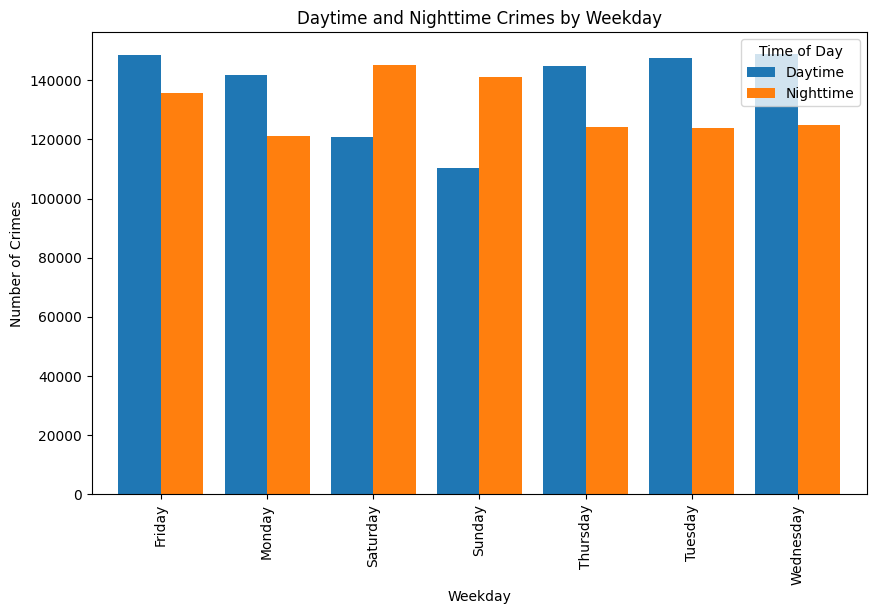

In [51]:
crime_by_weekday_df.plot(kind='bar', width=0.8, figsize=(10, 6))
plt.title('Daytime and Nighttime Crimes by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Crimes')
plt.legend(title='Time of Day', loc='upper right', labels=['Daytime', 'Nighttime'])
plt.show()

The weekends, seem to have alot more crimes at night time. This is probobly because people go out at night more those days and also drink and party more!

Though, they do also have less crimes during the daytime-

**7.3** Does the trends you've found in 7.3 also hold if you look at each year individually?

**7.4** Are there any weekdays in which Stalking occurs more often during nighttime?

**7.5*** Are there any specific primary crime types that most often occur during nights? If so, which ones are they? Where do they occur? Are certain days of the week notable here somehow?

# 8 - Grand Theft Auto

**8.1** You just bought a new car. What weekday should you be most wary of as it has the highest risk for a Grand Theft Auto-style robbery (MOTOR VEHICLE THEFT)?

In [52]:
chicago_crime_2001_to_2023_df_grand_theft = chicago_crime_2001_to_2023_df[chicago_crime_2001_to_2023_df["Primary Type"] == 'MOTOR VEHICLE THEFT']
weekday_counts_grand_theft = chicago_crime_2001_to_2023_df_grand_theft['Weekday'].value_counts()

location_counts_grand_theft = chicago_crime_2001_to_2023_df_grand_theft['Location Description'].value_counts()
Dangerous_location_grand_theft = location_counts_grand_theft.idxmax()

least_Dangerous_location_grand_theft = location_counts_grand_theft.idxmin()

worst_weekday_grand_theft = weekday_counts_grand_theft.idxmax()
worst_weekday_count_grand_theft = weekday_counts_grand_theft.max()

print(f"the worst weekday, for grand theft is {worst_weekday_grand_theft}, with {worst_weekday_count_grand_theft} grand theft crimes in total, with the most dangerous location for it being {Dangerous_location_grand_theft}")

the worst weekday, for grand theft is Friday, with 13622 grand theft crimes in total, with the most dangerous location for it being STREET


**8.2** For that day, where (at what location) should you absolutely avoid leave your car carelessly? Where is it seemingly safest to do so?

As answered before it is STREET that is the most dangerous.

In [66]:
print(f"and the places that is the safest to leave ur car is at a {least_Dangerous_location_grand_theft}")

and the places that is the safest to leave ur car is ANIMAL HOSPITAL


**8.3*** Are there certain periods of the year/month/day/time of day where GTA is more frequent?

# 9. Just send me like location

https://www.youtube.com/watch?v=k7yBJ5Ffkdo

**9.1** Are there any (geographical) areas hit particularly hard by prostitution on friday nights?

**9.2*** Can you vizualise the locations from 9.1 on a map of Chicago? Is there a concentration somewhere? 

**9.3*** Can you find any geographical concentration of other crime categories? Perhaps even by weekday and or day/nighttime or certain dates of the year? Plot these on a map of Chicago. 

# 10 - The $ factor

**10.1** Merge the crime and census datasets together in a suitable way.

**10.2*** Are there certain kinds of socoeconomic area that are more prone to certain kinds of crimes? Do a deep dive in the direction you fancy yourself here.

# 11 - Spotligt on you, Maestro!

There are obviously so much more to gain by analysing these datasets. This is now your opportunity to dwelve deeper into what you yourself like. Recall that the census data contributed with **alot** of dimensions.

    Instructions: think of one or several questions (as we've done above). Then, proceed with your own deep dive analysis and provide your answers.

# 12 - A moment of reflection

**12.1** Looking back at the analysis that you've done, what do you think about it? Specifically, how reliable are your conclusions? Is there anything that could be done to improve the factuality of the analysis? If so, what?